In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Dataset preparation

In [2]:
readmission_df = pd.read_csv('/home/pavlo/projects/readmission/data/diabetic_data.csv')


In [3]:
readmission_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
readmission_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
readmission_df.shape

(101766, 50)

Checking NaN values

In [6]:
readmission_df = readmission_df.replace('?', np.NaN)
navalues = readmission_df.isna().sum()
print(navalues)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
readmission_df.drop(['weight', 'payer_code', 'medical_specialty', 'diag_2', 'diag_3'], axis=1,  inplace=True)

In [8]:
readmission_df.race = readmission_df.race.fillna(readmission_df.race.mode()[0])
readmission_df.diag_1 = readmission_df.diag_1.fillna(readmission_df.diag_1.mode()[0])

In [9]:

navalues = readmission_df.isna().sum()
print(navalues)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [10]:
readmission_df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide                        4
glyburide                        4
tolbutamide                      2
pioglitazone        

We also delete 'citoglipton' and 'examide' columns as they have only 1 unique value, so they cannot affect our model in any way

In [11]:
readmission_df.drop(['citoglipton', 'examide'], axis=1, inplace=True)

There only 3 'Uknown/Ivalid' records for 'gender' column. In order not to delete this rows we will prescribe it to 'Male' as minority class)) 

In [12]:
indexgender = readmission_df[ readmission_df['gender'] == 'Unknown/Invalid'].index
readmission_df['gender'][indexgender] = 'Male'

---

In [13]:
readmission_df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

Change output feature to categorical variable 

In [14]:
readmission_df['readmitted30'] = np.where(readmission_df.readmitted == '<30', 1, 0)

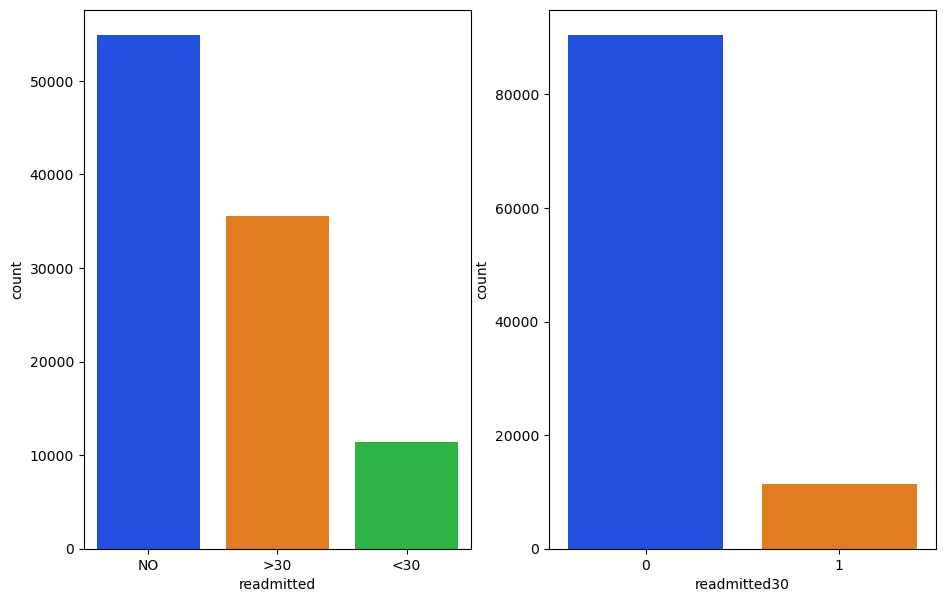

In [15]:
fig, ax =plt.subplots(1, 2,  figsize=(11, 7))
sns.countplot(data=readmission_df, x = "readmitted", ax = ax[0],  palette="bright")
sns.countplot(data=readmission_df, x = "readmitted30", ax = ax[1],  palette="bright")
fig.show()

In [16]:
readmission_df.groupby('readmitted30').size()

readmitted30
0    90409
1    11357
dtype: int64

In [17]:
readmission_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted30
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [18]:
readmission_df.groupby('patient_nbr').size()

patient_nbr
135          2
378          1
729          1
774          1
927          1
            ..
189351095    1
189365864    1
189445127    1
189481478    1
189502619    1
Length: 71518, dtype: int64

That shows us that patient can be admitted to the hospital more then once.

In [19]:
readmission_df.groupby('patient_nbr').value_counts

<bound method DataFrameGroupBy.value_counts of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f89c387b950>>

every addmision is identified by the unique encounter_id

<Axes: ylabel='Race'>

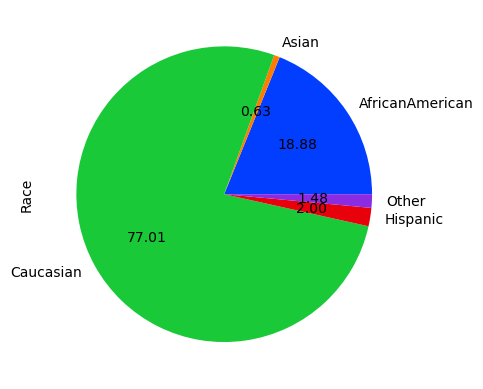

In [20]:
colors = sns.color_palette('bright')[0:5]

readmission_df.groupby('race').size().plot(kind='pie', autopct='%.2f', colors=colors, label="Race")


Majority of the population in the data set belongs to the ‘Caucasian’ Race followed by African American.

<Axes: xlabel='race', ylabel='count'>

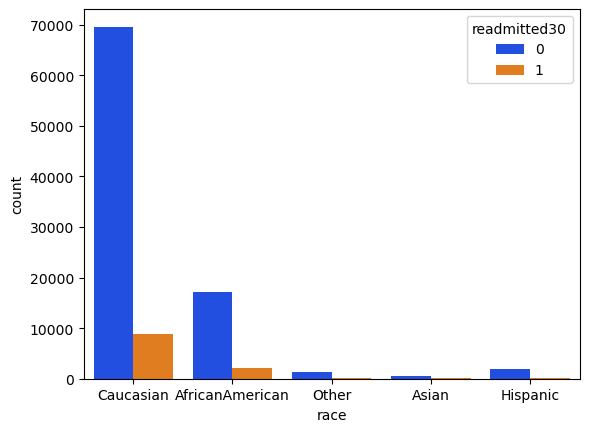

In [21]:
sns.countplot(readmission_df, x = 'race', hue = 'readmitted30', palette='bright')

<Axes: ylabel='Gender'>

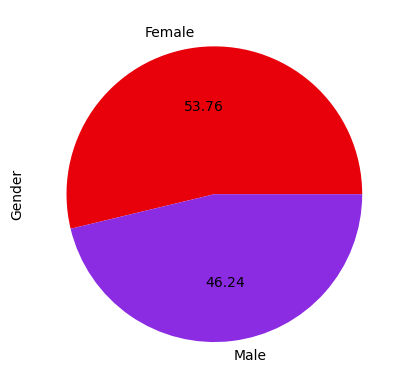

In [22]:
colors = sns.color_palette('bright')[3:5]

readmission_df.groupby('gender').size().plot(kind='pie', autopct='%.2f', colors=colors, label="Gender")


<Axes: xlabel='gender', ylabel='count'>

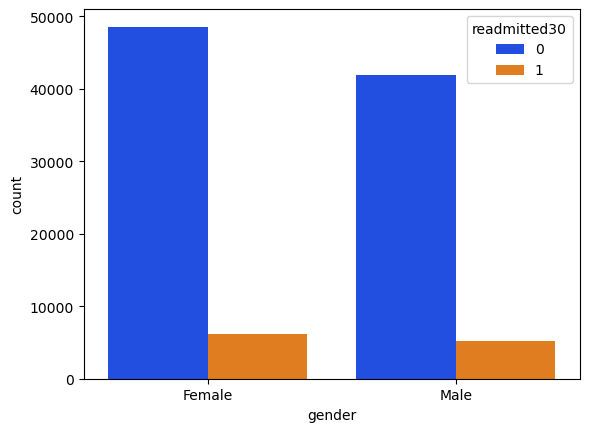

In [23]:
sns.countplot(readmission_df, x = 'gender', hue = 'readmitted30', palette='bright')

The data is almost equally distributed among the two categories of Males and Females

<Axes: xlabel='age', ylabel='count'>

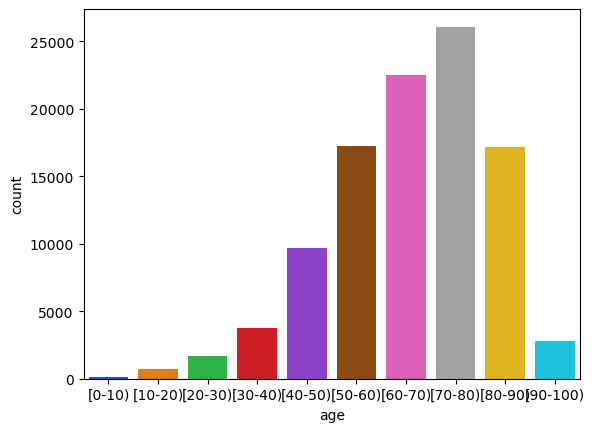

In [24]:
sns.countplot(readmission_df, x='age', palette='bright')

<Axes: xlabel='age', ylabel='count'>

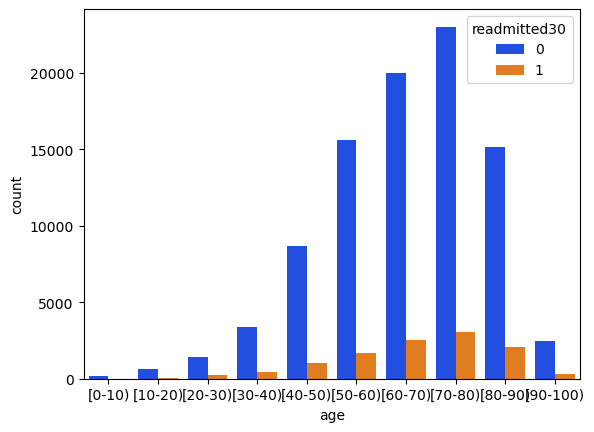

In [25]:
sns.countplot(readmission_df, x='age', hue='readmitted30',palette='bright')

Readmittion exactly follows age distribution.

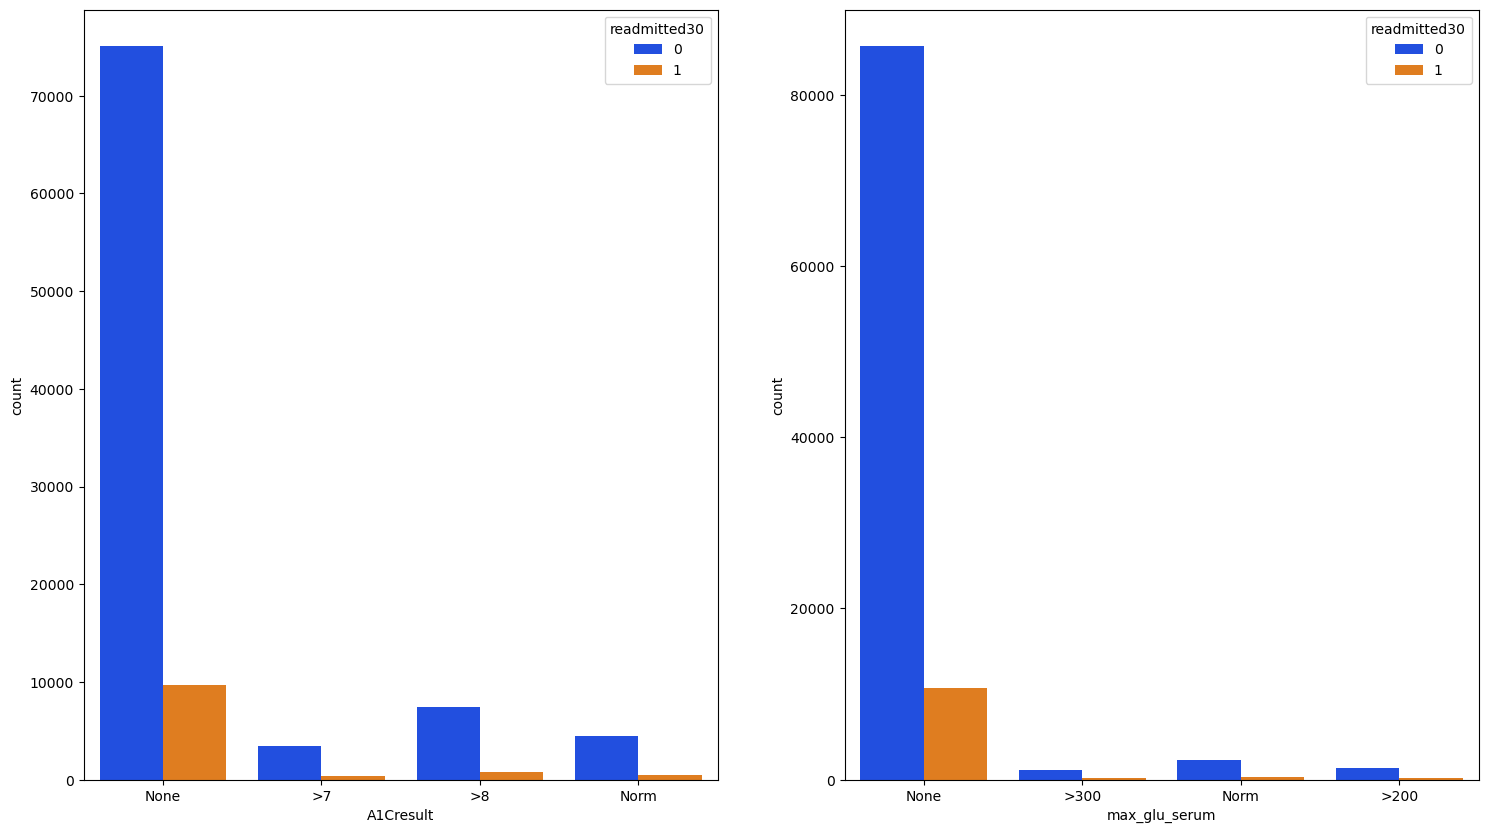

In [26]:
fig, ax =plt.subplots(1, 2, figsize=(18, 10))
sns.countplot(readmission_df, x='A1Cresult', hue='readmitted30',palette='bright', ax = ax[0])
sns.countplot(readmission_df, x='max_glu_serum', hue='readmitted30',palette='bright', ax= ax[1])
fig.show()

Both A1Cresult and max_glu_serum are strong indicators of glugose in the body. The majority of nodes for this features are marked as 'None' 

<Axes: xlabel='number_diagnoses', ylabel='count'>

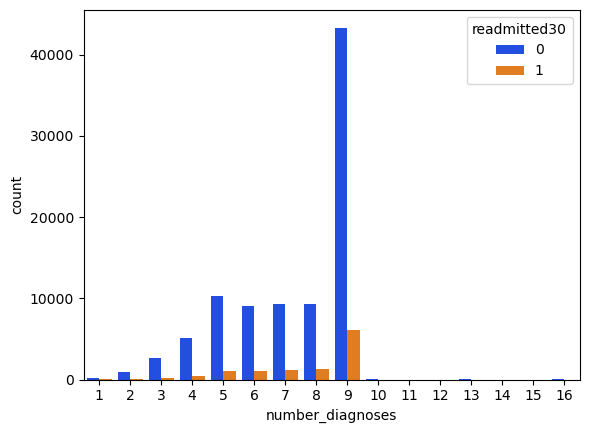

In [27]:
sns.countplot(readmission_df, x='number_diagnoses', hue='readmitted30', palette='bright')

<Axes: xlabel='num_lab_procedures', ylabel='count'>

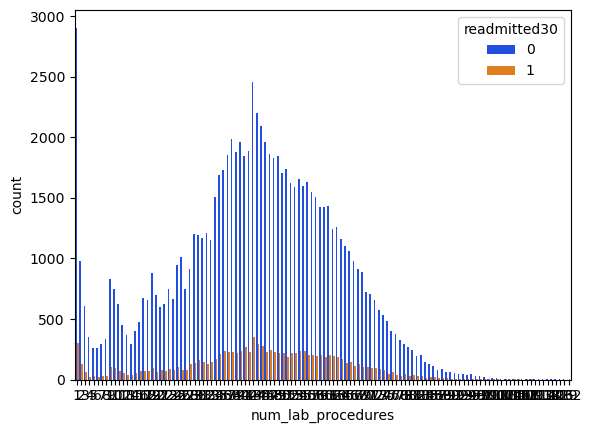

In [28]:
sns.countplot(readmission_df, x='num_lab_procedures', hue='readmitted30',palette='bright')

<Axes: xlabel='num_procedures', ylabel='count'>

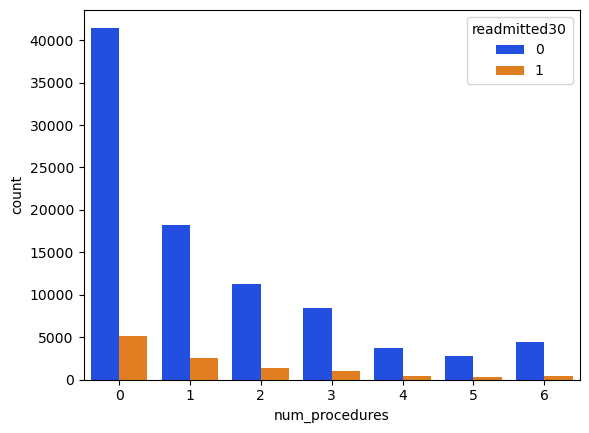

In [29]:
sns.countplot(readmission_df, x='num_procedures', hue='readmitted30',palette='bright')

<Axes: xlabel='num_medications', ylabel='count'>

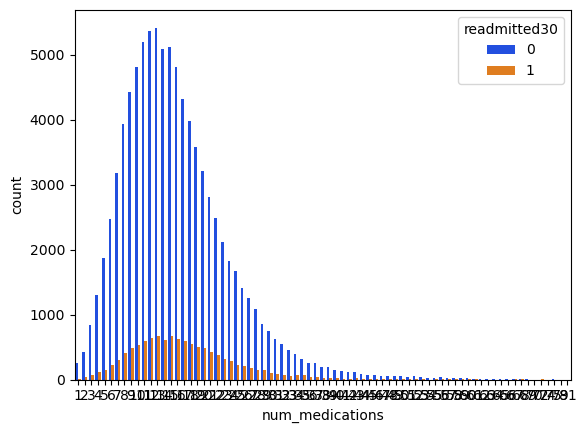

In [30]:
sns.countplot(readmission_df, x='num_medications', hue='readmitted30',palette='bright')

<Axes: xlabel='time_in_hospital', ylabel='count'>

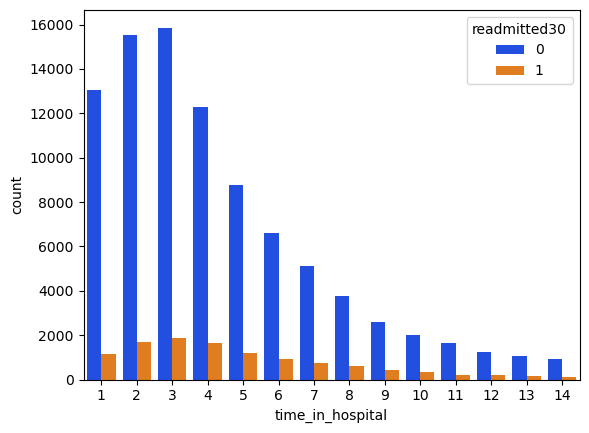

In [31]:
sns.countplot(readmission_df, x='time_in_hospital', hue='readmitted30',palette='bright')

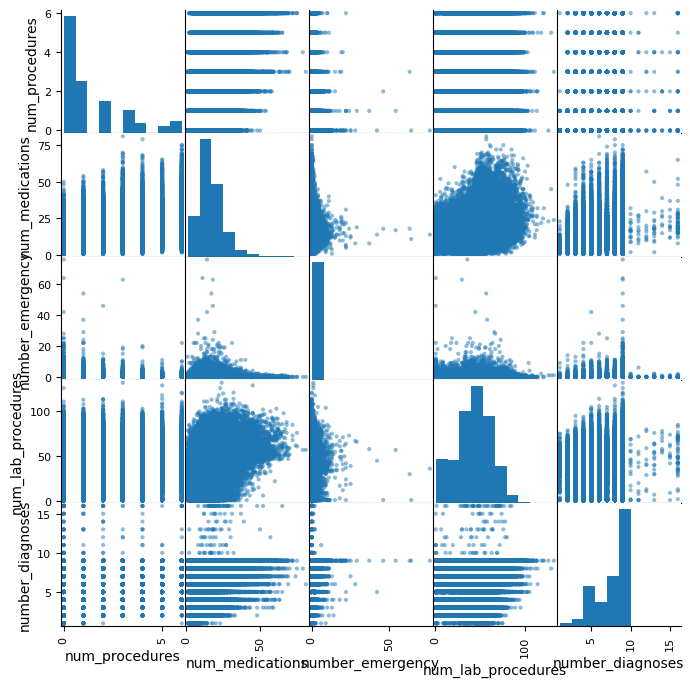

In [32]:
sm = pd.plotting.scatter_matrix(readmission_df[['num_procedures', 'num_medications', 'number_emergency', 'num_lab_procedures', 'number_diagnoses']], figsize = (8, 8))
sns.despine()


### Creating new features

<em>number_inpatient</em>, <em>number_emergency</em> and <em>number_outpatient</em> show how much hospital servises used the patient, we can sum them up and create new feature <em>services_used</em>

In [33]:
readmission_df['services_used'] = readmission_df['number_inpatient'] + readmission_df['number_emergency'] + readmission_df['number_outpatient']

In [34]:
readmission_df.drop(['number_inpatient', 'number_emergency', 'number_outpatient', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)

Our dataset has a vast amount of medicational features, with fixed categorical status ('Up', 'Down', 'Steady', 'No'). 'Up' and 'down' stand for increasing or decreasing the dosage, with 'steady' and 'no' means that dosage wasn't changed or even prescribed. We can create a new feature, <em>num_changes</em> for counting how many dosage changes were for patient. We could 'up' and down' as 1, also 'steady' and'no' as 0 for each medication. 

In [35]:
readmission_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted30', 'services_used'],
      dtype='object')

In [36]:
def get_num_changes(medications, readmission_df):
    result = pd.Series(np.zeros(readmission_df.shape[0])).astype(int)
    for col in medications:
        result = (result.add(readmission_df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)))
    return result

In [37]:
medications = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

readmission_df['num_changes'] = get_num_changes(medications, readmission_df).astype(int)
readmission_df['num_changes'].value_counts()

0    74063
1    26272
2     1318
3      108
4        5
Name: num_changes, dtype: int64

Also lets crate a feature for all medications that are in use. Count 'up', 'down' and 'steady' as 1 and 'no' as 0.

In [38]:
def get_num_meds_use(medications, readmission_df):
    result = pd.Series(np.zeros(readmission_df.shape[0])).astype(int)
    for col in medications:
        result = (result.add(readmission_df[col].apply(lambda x: 0 if (x == 'No') else 1)))
    return result

In [39]:
readmission_df['num_meds_use'] = get_num_meds_use(medications, readmission_df)
readmission_df['num_meds_use'].value_counts()

1    47314
0    23403
2    21873
3     7778
4     1335
5       58
6        5
Name: num_meds_use, dtype: int64

In [40]:
readmission_df.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

We will reduce variance in categorical features for their similar meanings. Firstly, considering <em>admission_type_id</em> categories with explanations from dataset description
|num|category|
|---|---|
|1|Emergency|
|2|Urgent|
|3|Elective|
|4|Newborn|
|5|Not available|
|6|null|
|7|Trauma|
|8|Not mapped|

Lets combine categories:
|num|category                  |||
|---|:--------:|-------:|--------:|
|1  |Emergency |Urgent  |   Trauma|
|2  |Elective  |        |         |
|3  |Newborn   |        |         |
|4  |Not available|null|Not mapped|



In [41]:
def category_combine(column, combining_dict):
    try:
        for key in combining_dict.keys():
            column = column.replace(key, combining_dict[key])
    except KeyError:
        print("combining_dict does not match columns categories")
        
    return column


In [42]:
combining_addmission_type = {
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 4,
    7 : 1,
    8 : 4
}
readmission_df['admission_type_id'] = category_combine(readmission_df['admission_type_id'], combining_addmission_type)


In [43]:
readmission_df['admission_type_id'].unique()

array([4, 1, 2, 3])

Also we will combine <em>admission_source_id</em> column

In [44]:
readmission_df['admission_source_id'].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [45]:
combining_addmission_source = {
    2:1,
    3:1,
    4:4,
    5:4,
    6:4,
    10:4,
    22:4,
    25:4,
    15:9,
    17:9,
    20:9,
    21:9,
    13:11,
    14:11
}
readmission_df['admission_source_id'] = category_combine(readmission_df['admission_source_id'], combining_addmission_source)


In [46]:
readmission_df['admission_source_id'].unique()

array([ 1,  7,  4,  9,  8, 11])

In [47]:
len(readmission_df['diag_1'].unique())

716

Let's create categories for diagnoses, not handle a variety of 716 ones.
Dataset description says that diagnoses are ICD-9 codes. Due to wikipedia(https://en.wikipedia.org/wiki/List_of_ICD-9_codes):

* List of ICD-9 codes 001–139: infectious and parasitic diseases

* List of ICD-9 codes 140–239: neoplasms

* List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders

* List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs

* List of ICD-9 codes 290–319: mental disorders

* List of ICD-9 codes 320–389: diseases of the nervous system and sense organs

* List of ICD-9 codes 390–459: diseases of the circulatory system

* List of ICD-9 codes 460–519: diseases of the respiratory system

* List of ICD-9 codes 520–579: diseases of the digestive system

* List of ICD-9 codes 580–629: diseases of the genitourinary system

* List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium

* List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue

* List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue

* List of ICD-9 codes 740–759: congenital anomalies

* List of ICD-9 codes 760–779: certain conditions originating in the perinatal period

* List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions

* List of ICD-9 codes 800–999: injury and poisoning

* List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

<em>change</em> valiable stands for the change in diabetic medcines. We will rewrite "Ch" as 1 and "No" as 0.
Same with other columns: <em>diabetesMed</em>, <em>gender</em>, <em>age</em>, <em>A1Cresult</em>

In [48]:
def categorizing_features(readmission_df):

    readmission_df.loc[readmission_df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
    readmission_df.loc[readmission_df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0

    readmission_df['diag_1'] = readmission_df['diag_1'].astype(float)

    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=1) & (readmission_df['diag_1']< 140)] = 1
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=140) & (readmission_df['diag_1']< 240)] = 2
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=240) & (readmission_df['diag_1']< 280)] = 3
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=280) & (readmission_df['diag_1']< 290)] = 4
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=290) & (readmission_df['diag_1']< 320)] = 5
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=320) & (readmission_df['diag_1']< 390)] = 6
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=390) & (readmission_df['diag_1']< 460)] = 7
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=460) & (readmission_df['diag_1']< 520)] = 8
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=520) & (readmission_df['diag_1']< 580)] = 9
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=580) & (readmission_df['diag_1']< 630)] = 10
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=630) & (readmission_df['diag_1']< 680)] = 11
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=680) & (readmission_df['diag_1']< 710)] = 12
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=710) & (readmission_df['diag_1']< 740)] = 13
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=740) & (readmission_df['diag_1']< 760)] = 14
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=760) & (readmission_df['diag_1']< 780)] = 15
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=780) & (readmission_df['diag_1']< 800)] = 16
    readmission_df['diag_1'].loc[(readmission_df['diag_1']>=800) & (readmission_df['diag_1']< 1000)] = 17
    readmission_df['diag_1'].loc[(readmission_df['diag_1']==-1)] = 0


    readmission_df['change'] = readmission_df['change'].replace('Ch', 1)
    readmission_df['change'] = readmission_df['change'].replace('No', 0)


    readmission_df['diabetesMed'] = readmission_df['diabetesMed'].replace('Yes', 1)
    readmission_df['diabetesMed'] = readmission_df['diabetesMed'].replace('No', 0)


    readmission_df['gender'] = readmission_df['gender'].replace('Male', 1)
    readmission_df['gender'] = readmission_df['gender'].replace('Female', 1)
    
    age_dict = {'[0-10)' : 5, '[10-20)' : 15, '[20-30)' : 25, '[30-40)' : 45, '[40-50)' : 45, '[50-60)' : 55, '[60-70)' : 65, '[70-80)' : 75,'[80-90)' : 85, '[90-100)' : 95}

    readmission_df['age'] = readmission_df['age'].map(age_dict)

    readmission_df['A1Cresult'] = readmission_df['A1Cresult'].replace('>7', 1)
    readmission_df['A1Cresult'] = readmission_df['A1Cresult'].replace('>8', 1)
    readmission_df['A1Cresult'] = readmission_df['A1Cresult'].replace('Norm', 0)
    readmission_df['A1Cresult'] = readmission_df['A1Cresult'].replace('None', -99)

    readmission_df['max_glu_serum'] = readmission_df['max_glu_serum'].replace('>200', 1)
    readmission_df['max_glu_serum'] = readmission_df['max_glu_serum'].replace('>300', 1)
    readmission_df['max_glu_serum'] = readmission_df['max_glu_serum'].replace('Norm', 0)
    readmission_df['max_glu_serum'] = readmission_df['max_glu_serum'].replace('None', -99)

    return readmission_df
    

In [49]:
readmission_df = categorizing_features(readmission_df)

In [50]:
readmission_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted30', 'services_used', 'num_changes', 'num_meds_use'],
      dtype='object')

In [51]:
obj_cols = ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'max_glu_serum', 'diag_1']

In [52]:
readmission_df[obj_cols] =readmission_df[obj_cols].astype(object)

In [53]:
num_cols = ['age',
            'num_procedures',
            'time_in_hospital',
            'num_lab_procedures',
            'services_used',
            'num_changes',
            'num_meds_use',
            'num_medications',
            'number_diagnoses']

<Axes: >

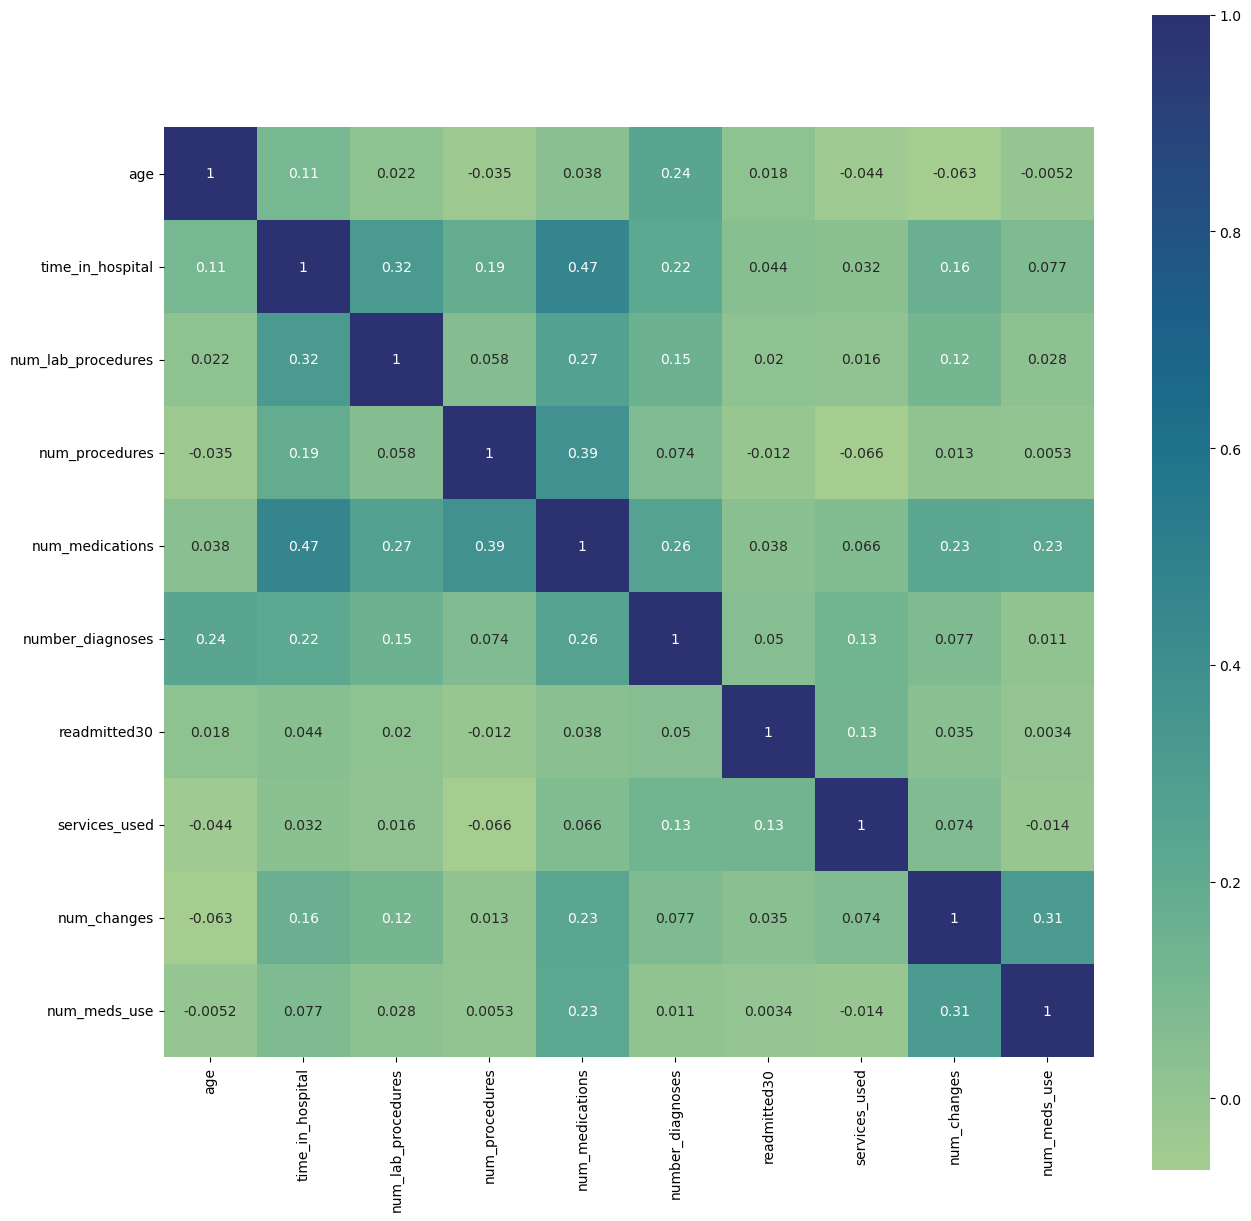

In [54]:
corrmat = readmission_df.corr()

fig =plt.subplots( figsize=(15, 15))
sns.heatmap(corrmat, annot=True, square=True, cmap="crest")

## Standartization

In [55]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

scaler = StandardScaler()
readmission_df[num_cols] =  scaler.fit_transform(readmission_df[num_cols])  

scaler_filename = "/home/pavlo/projects/readmission/models/scaler.save"
joblib.dump(scaler, scaler_filename)


['/home/pavlo/projects/readmission/models/scaler.save']

In [56]:
readmission_df[num_cols].describe(percentiles=[.10, .90])

,age,num_procedures,time_in_hospital,num_lab_procedures,services_used,num_changes,num_meds_use,num_medications,number_diagnoses
count,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05
mean,1.005426e-16,-1.717602e-17,5.082986e-17,1.111554e-16,4.133417e-17,-1.536067e-16,-1.480210e-17,-1.323811e-16,1.988509e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.003759e+00,-7.853977e-01,-1.137649e+00,-2.139630e+00,-5.248168e-01,-5.895993e-01,-1.282031e+00,-1.848268e+00,-3.321596e+00
10%,-1.392809e+00,-7.853977e-01,-1.137649e+00,-1.478868e+00,-5.248168e-01,-5.895993e-01,-1.282031e+00,-1.110036e+00,-1.252906e+00
50%,-8.733441e-02,-1.991621e-01,-1.326548e-01,4.596660e-02,-5.248168e-01,-5.895993e-01,-1.952936e-01,-1.257264e-01,2.986119e-01
90%,1.218140e+00,1.559545e+00,1.542335e+00,1.215006e+00,7.842152e-01,1.461582e+00,8.914435e-01,1.227699e+00,8.157845e-01
max,1.870878e+00,2.732016e+00,3.217324e+00,4.518815e+00,3.438270e+01,7.615127e+00,5.238392e+00,7.994826e+00,4.435992e+00


In [57]:
#for col in num_cols:
#    to_drop = readmission_df[(readmission_df[col] > readmission_df[col].describe([.95]).loc['95%']) | (readmission_df[col] < readmission_df[col].describe([.05]).loc['5%'])].index
#    readmission_df.drop(to_drop, inplace=True)

In [58]:
readmission_df.shape

(101766, 42)

In [59]:
df = pd.get_dummies(readmission_df, columns=['race', 'gender', 'admission_type_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'diag_1'])

In [60]:
df.columns

Index(['age', 'discharge_disposition_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'readmitted', 'readmitted30', 'services_used',
       'num_changes', 'num_meds_use', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1',
       'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
       'admission_type_id_4', 'admission_source_id_1', 'admission_source_id_4',
       'admission_source_id_7', 'admission_source_id_8',
       'admission_source_id_9', 'admissi

Get our featureset:

In [61]:
feature_set = ['age', 'discharge_disposition_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'services_used',
       'num_changes', 'num_meds_use', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1',
       'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
       'admission_type_id_4', 'admission_source_id_1', 'admission_source_id_4',
       'admission_source_id_7', 'admission_source_id_8',
       'admission_source_id_9', 'admission_source_id_11', 'max_glu_serum_-99',
       'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_-99', 'A1Cresult_0',
       'A1Cresult_1', 'change_0', 'change_1', 'diabetesMed_0', 'diabetesMed_1',
       'diag_1_0.0', 'diag_1_1.0', 'diag_1_2.0', 'diag_1_3.0', 'diag_1_4.0',
       'diag_1_5.0', 'diag_1_6.0', 'diag_1_7.0', 'diag_1_8.0', 'diag_1_9.0',
       'diag_1_10.0', 'diag_1_11.0', 'diag_1_12.0', 'diag_1_13.0',
       'diag_1_14.0', 'diag_1_16.0', 'diag_1_17.0']

In [62]:
len(df[df.readmitted30==1])/len(df[df.readmitted30==0])

0.1256180247541727

Our dataset has only 12% of records corresponding to readmitted category. We will be using SMOTE for balancing our data.

In [63]:
train_input = df[feature_set]
train_output = df['readmitted30']

In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Origin shape {}' .format(Counter(train_output)))
sm = SMOTE(random_state=0)
train_input_new, train_output_new = sm.fit_resample(train_input, train_output)
print('New dataset shape {}' .format(Counter(train_output_new)))


Origin shape Counter({0: 90409, 1: 11357})
New dataset shape Counter({0: 90409, 1: 90409})


## Model Development

For our evaluation of our models, we will look at 4 metrics: <em>Accuracy, Recall, Precision, AUC</em>

We have selected <em>KNearestNeighbors (KNN), Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Bagging Classifier, AdaBoost Classifier & Gradient Boosting Classifier</em> as the base models.

In [65]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_readmissions, test_readmissions = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [66]:
train_set.shape

(144654, 53)

In [67]:
train_readmissions.shape

(144654,)

In [68]:
train_readmissions.value_counts()

0    72402
1    72252
Name: readmitted30, dtype: int64

In [69]:
test_readmissions.value_counts()

1    18157
0    18007
Name: readmitted30, dtype: int64

As we did oversampled, particularly SMOTE, and now we can admit that there is representative distribution of 'readmitted' values in train and test sets. 

In [70]:
model_results = pd.DataFrame(columns=['classifier', 'accuracy', 'precision', 'recall', 'AUC'])

### KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(train_set, train_readmissions)

KNeighborsClassifier(n_neighbors=100)

In [73]:
knn_predict = knn.predict(test_set)

In [74]:
print(knn.score(test_set, test_readmissions))

0.6552649043247428


In [75]:
from sklearn import metrics

In [76]:
def print_conflusion_matrix(test_readmissions, predict):
    conflusion_matrix = pd.DataFrame(metrics.confusion_matrix(test_readmissions, predict),
                                     columns=["Predicted Class" + str(class_name) for class_name in [0,1]],
                                     index = ["Actual Class" + str(class_name) for class_name in [0,1]])

    print(conflusion_matrix)
    print(metrics.classification_report(test_readmissions, predict))

In [77]:
print_conflusion_matrix(test_readmissions, knn_predict)

               Predicted Class0  Predicted Class1
Actual Class0              7136             10871
Actual Class1              1596             16561
              precision    recall  f1-score   support

           0       0.82      0.40      0.53     18007
           1       0.60      0.91      0.73     18157

    accuracy                           0.66     36164
   macro avg       0.71      0.65      0.63     36164
weighted avg       0.71      0.66      0.63     36164



In [78]:
def plotRoc(cl, test_set, test_readmissions):
    probs = cl.predict_proba(test_set)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(test_readmissions, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC')
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

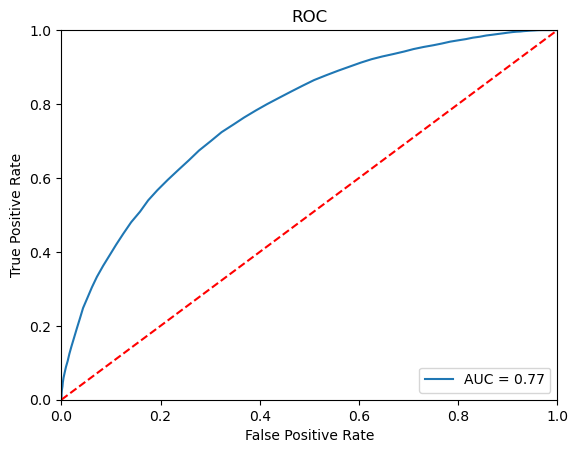

In [79]:
plotRoc(knn, test_set, test_readmissions)

Performance of KNN Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.641|0.59|0.92|0.76|

In [80]:
model_results.loc[len(model_results)] = ['KNN', 0.64, 0.59, 0.92, 0.76]

## Naive Bayes Classifier

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_set, train_readmissions)

GaussianNB()

In [82]:
nb_predict = nb.predict(test_set)

In [83]:
print(nb.score(test_set, test_readmissions))

0.5907532352615861


In [84]:
print_conflusion_matrix(test_readmissions, nb_predict)

               Predicted Class0  Predicted Class1
Actual Class0              4539             13468
Actual Class1              1332             16825
              precision    recall  f1-score   support

           0       0.77      0.25      0.38     18007
           1       0.56      0.93      0.69     18157

    accuracy                           0.59     36164
   macro avg       0.66      0.59      0.54     36164
weighted avg       0.66      0.59      0.54     36164



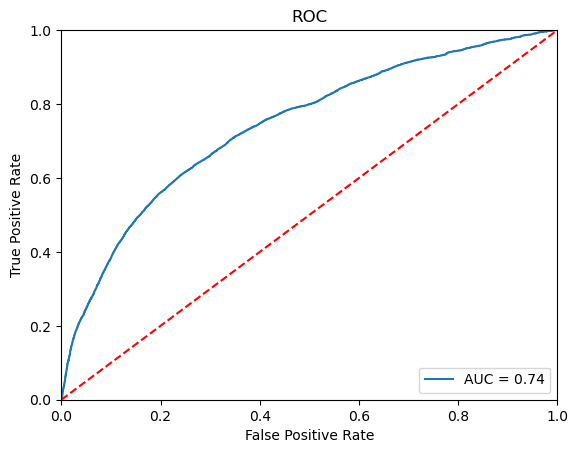

In [85]:
plotRoc(nb, test_set, test_readmissions)

Performance of Naive Bayes Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.577|0.55|0.95|0.73|

In [86]:
model_results.loc[len(model_results)] = ['Naive Bayes', 0.57, 0.55, 0.95, 0.73]

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(train_set, train_readmissions)

LogisticRegression()

In [88]:
lreg_predict = lreg.predict(test_set)

In [89]:
print(lreg.score(test_set, test_readmissions))

0.7983906647494746


In [90]:
print_conflusion_matrix(test_readmissions, lreg_predict)

               Predicted Class0  Predicted Class1
Actual Class0             16929              1078
Actual Class1              6213             11944
              precision    recall  f1-score   support

           0       0.73      0.94      0.82     18007
           1       0.92      0.66      0.77     18157

    accuracy                           0.80     36164
   macro avg       0.82      0.80      0.79     36164
weighted avg       0.82      0.80      0.79     36164



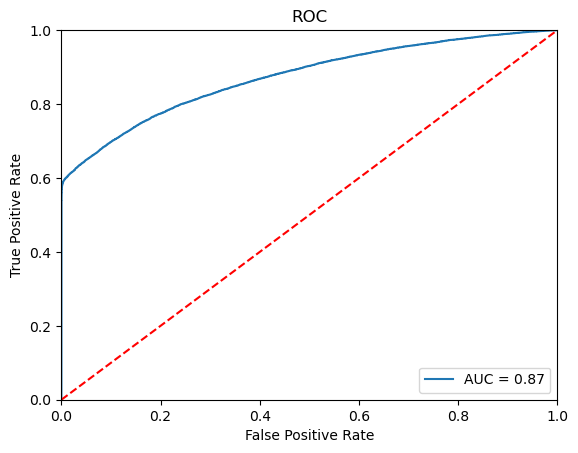

In [91]:
plotRoc(lreg, test_set, test_readmissions)

Performance of Logistic Regression Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.79|0.91|0.65|0.87|

In [92]:
model_results.loc[len(model_results)] = ['Log regression', 0.79, 0.91, 0.65, 0.87]

## Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(train_set, train_readmissions)

DecisionTreeClassifier(criterion='entropy')

In [94]:
df_predict = dt.predict(test_set)
print(dt.score(test_set, test_readmissions))

0.8780831766397522


In [95]:
print_conflusion_matrix(test_readmissions, df_predict)

               Predicted Class0  Predicted Class1
Actual Class0             15613              2394
Actual Class1              2015             16142
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     18007
           1       0.87      0.89      0.88     18157

    accuracy                           0.88     36164
   macro avg       0.88      0.88      0.88     36164
weighted avg       0.88      0.88      0.88     36164



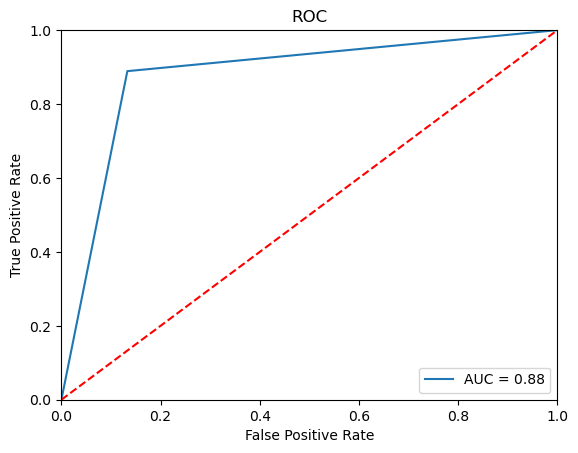

In [96]:
plotRoc(dt, test_set, test_readmissions)

In [97]:
def plot_most_important_features(cl, train_set, name):
    feature_importance = cl.feature_importances_
    most_imp_features = pd.DataFrame([f for f in zip(train_set.columns, feature_importance)], columns = ["Feature", "Importance"]).nlargest(20, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
    plt.xlabel('Importance')
    plt.title('Most important features - ' + name)
    plt.show()

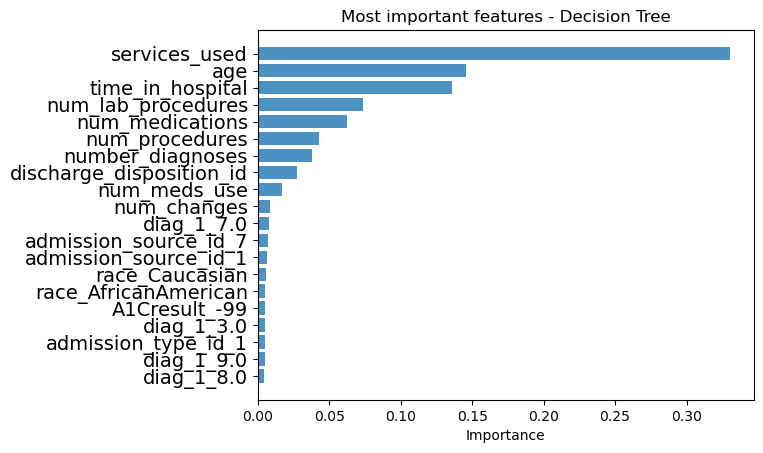

In [98]:

plot_most_important_features(dt, train_set, 'Decision Tree')

Performance of Decision Tree Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.88|0.88|0.89|0.88|

In [99]:
model_results.loc[len(model_results)] = ['Decision Tree', 0.88, 0.88, 0.89, 0.88]

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

rf.fit(train_set, train_readmissions)


RandomForestClassifier()

In [101]:
rf_predict = rf.predict(test_set)

In [102]:
print(rf.score(test_set, test_readmissions))

0.9406315673045017


In [103]:
print_conflusion_matrix(test_readmissions, rf_predict)

               Predicted Class0  Predicted Class1
Actual Class0             17875               132
Actual Class1              2015             16142
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     18007
           1       0.99      0.89      0.94     18157

    accuracy                           0.94     36164
   macro avg       0.95      0.94      0.94     36164
weighted avg       0.95      0.94      0.94     36164



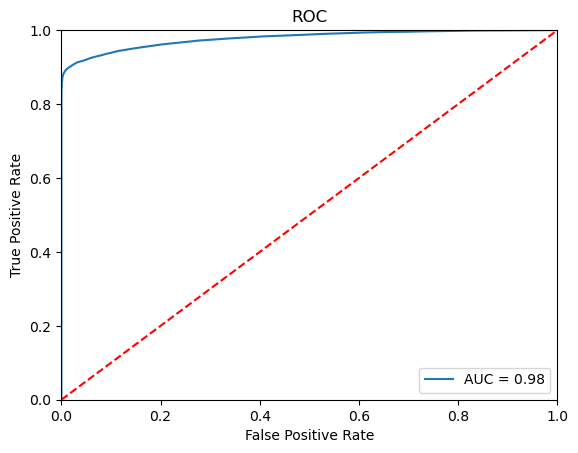

In [104]:
plotRoc(rf, test_set, test_readmissions)

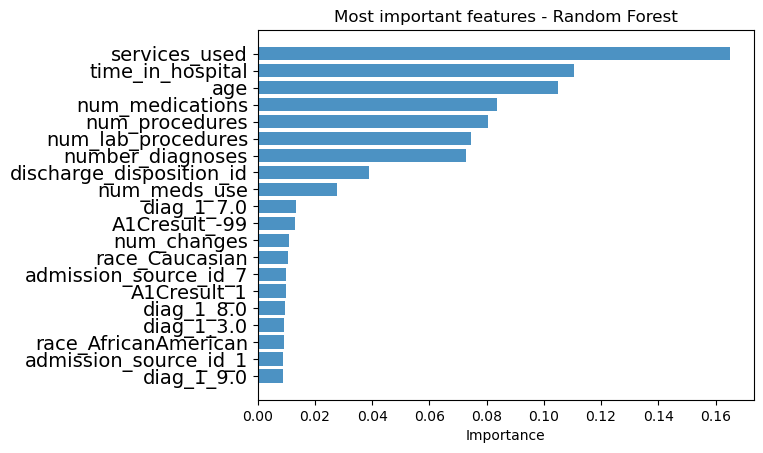

In [105]:
plot_most_important_features(rf, train_set, 'Random Forest')

Performance of Random Forest Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.94|0.99|0.89|0.98|

In [106]:
model_results.loc[len(model_results)] = ['Random Forest', 0.94, 0.99, 0.89, 0.98]

## Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(bootstrap=True, oob_score=True)

In [108]:
bgc.fit(train_set, train_readmissions)

BaggingClassifier(oob_score=True)

In [109]:
bgc_predict = bgc.predict(test_set)

In [110]:
print(bgc.score(test_set, test_readmissions))

0.9240128304391108


In [111]:
bgc.oob_score_

0.9024085058138731

In [112]:
print_conflusion_matrix(test_readmissions, bgc_predict)

               Predicted Class0  Predicted Class1
Actual Class0             17578               429
Actual Class1              2319             15838
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18007
           1       0.97      0.87      0.92     18157

    accuracy                           0.92     36164
   macro avg       0.93      0.92      0.92     36164
weighted avg       0.93      0.92      0.92     36164



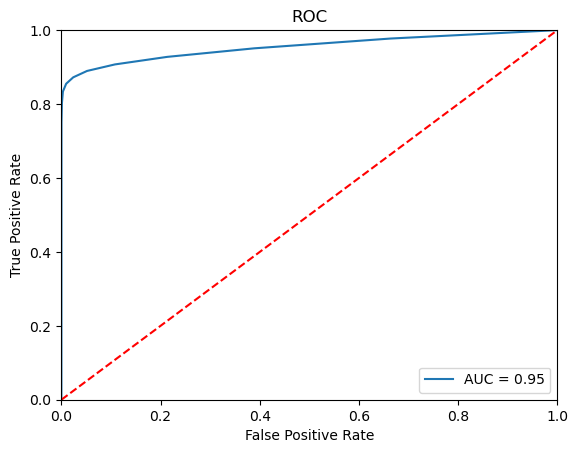

In [113]:
plotRoc(bgc, test_set, test_readmissions)

Performance of AdaBoost Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.92|0.98|0.87|0.95|

In [114]:
model_results.loc[len(model_results)] = ['Bagging', 0.92, 0.98, 0.87, 0.95]

## AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator= dt)
abc.fit(train_set, train_readmissions)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'))

In [116]:
abc_predict = abc.predict(test_set)

In [117]:
print(abc.score(test_set, test_readmissions))

0.8795763742948789


In [118]:
print_conflusion_matrix(test_readmissions, abc_predict)

               Predicted Class0  Predicted Class1
Actual Class0             15700              2307
Actual Class1              2048             16109
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     18007
           1       0.87      0.89      0.88     18157

    accuracy                           0.88     36164
   macro avg       0.88      0.88      0.88     36164
weighted avg       0.88      0.88      0.88     36164



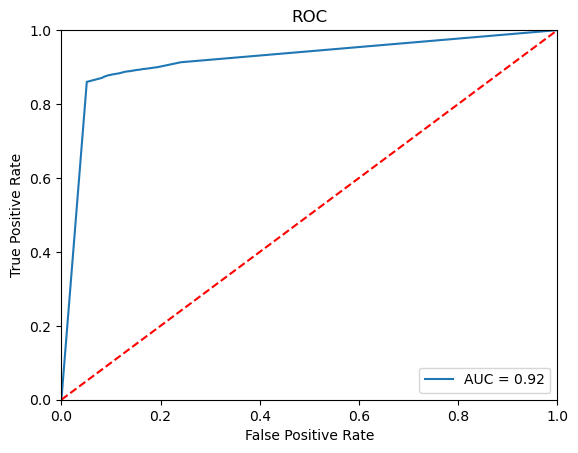

In [119]:
plotRoc(abc, test_set, test_readmissions)

Performance of AdaBoost Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.87|0.87|0.89|0.93|

In [120]:
model_results.loc[len(model_results)] = ['AdaBoost', 0.87, 0.87, 0.89, 0.93]

## Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.01)

In [122]:
gbc.fit(train_set, train_readmissions)

GradientBoostingClassifier(learning_rate=0.01)

In [123]:
gbc_predict = gbc.predict(test_set)

In [124]:
print(gbc.score(test_set, test_readmissions))

0.7391051874792611


In [125]:
print_conflusion_matrix(test_readmissions, gbc_predict)

               Predicted Class0  Predicted Class1
Actual Class0             13769              4238
Actual Class1              5197             12960
              precision    recall  f1-score   support

           0       0.73      0.76      0.74     18007
           1       0.75      0.71      0.73     18157

    accuracy                           0.74     36164
   macro avg       0.74      0.74      0.74     36164
weighted avg       0.74      0.74      0.74     36164



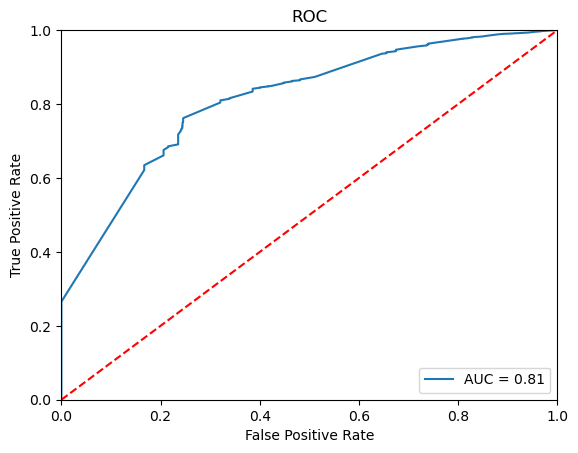

In [126]:
plotRoc(gbc, test_set, test_readmissions)

Performance of Gradient Boosting Classifier:
|Accuracy|precision|recall|AUC|
|---|---|---|---|
|0.74|0.75|0.71|0.81|

In [127]:
model_results.loc[len(model_results)] = ['Gradient Boosting', 0.74, 0.75, 0.71, 0.81]

## Results

In [128]:
model_results.set_index('classifier', inplace=True)


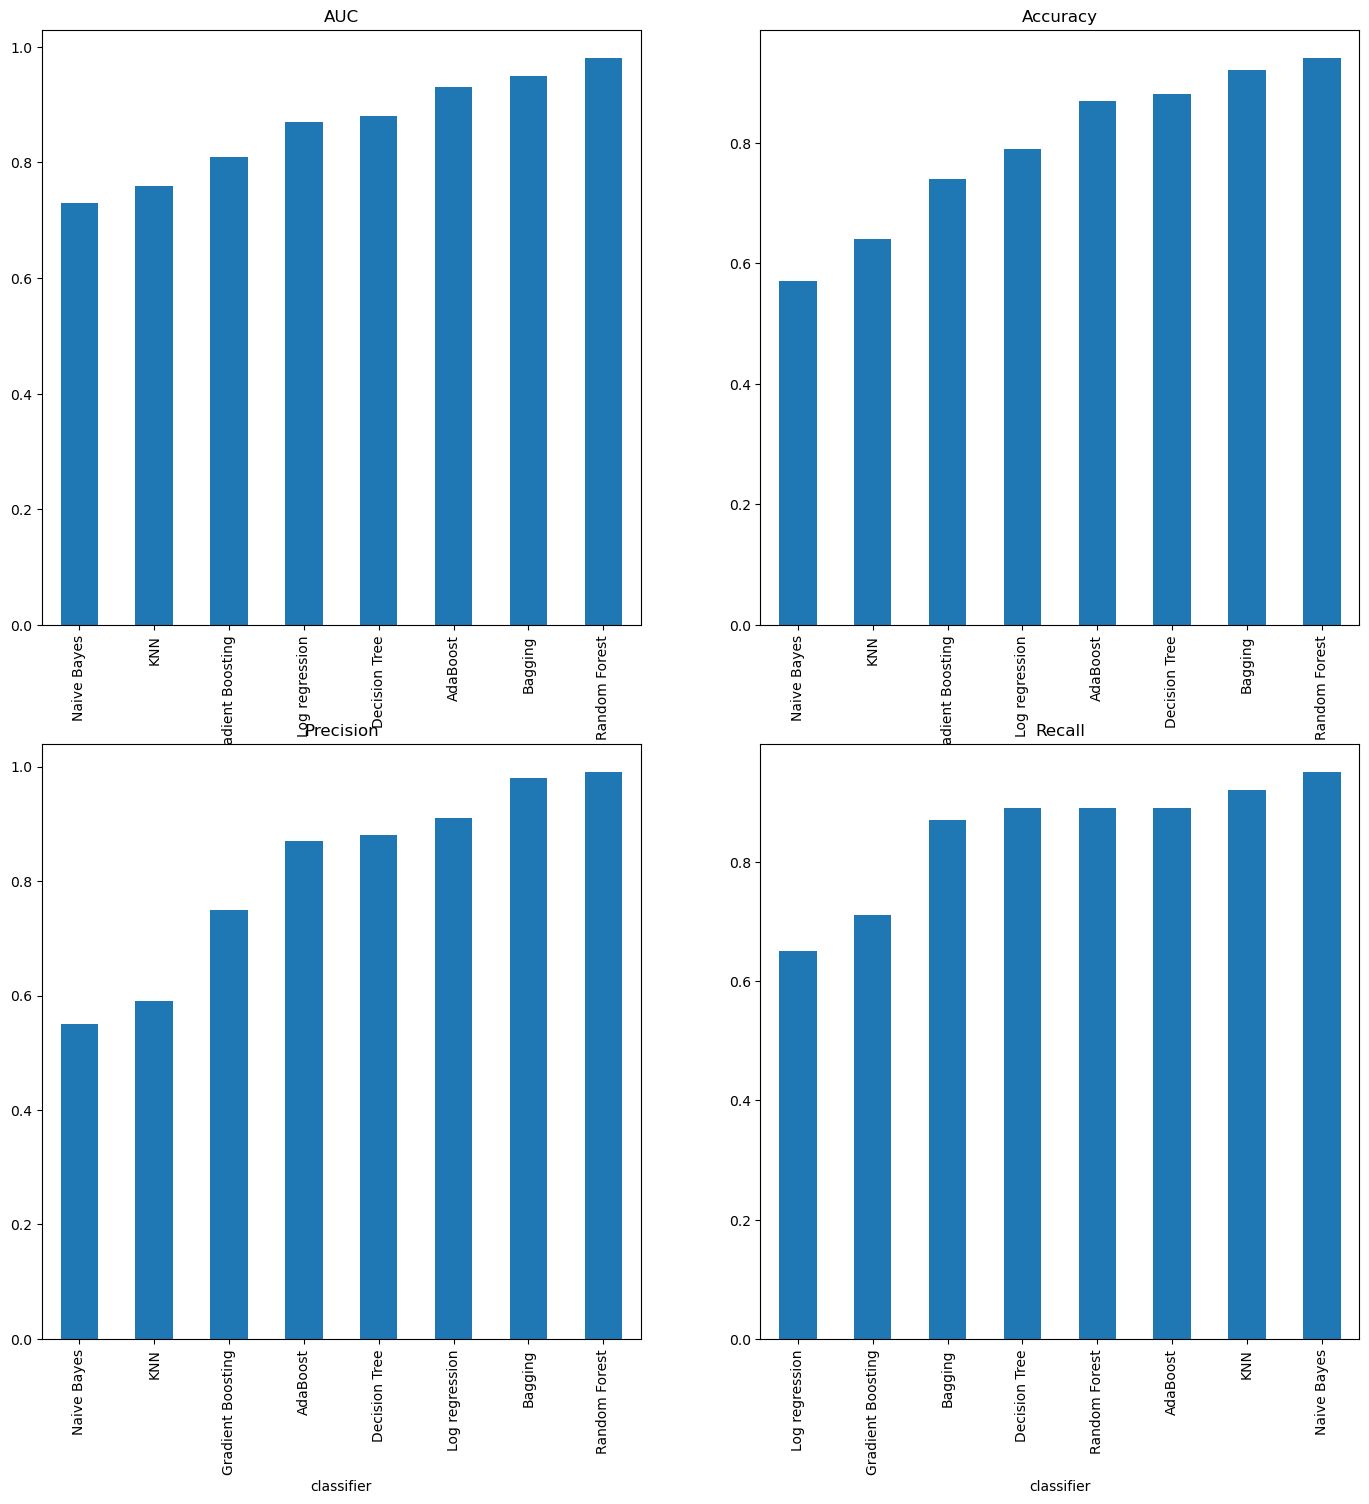

In [129]:
fig, ax = plt.subplots(2,2, figsize=(17,17))
model_results['AUC'].sort_values().plot(kind='bar', title='AUC', ax=ax[0][0])
model_results['accuracy'].sort_values().plot(kind='bar', title='Accuracy', ax=ax[0][1])
model_results['precision'].sort_values().plot(kind='bar', title='Precision', ax=ax[1][0])
model_results['recall'].sort_values().plot(kind='bar', title='Recall', ax=ax[1][1])
fig.show()

In [134]:
model_results

,accuracy,precision,recall,AUC
classifier,,,,
KNN,0.64,0.59,0.92,0.76
Naive Bayes,0.57,0.55,0.95,0.73
Log regression,0.79,0.91,0.65,0.87
Decision Tree,0.88,0.88,0.89,0.88
Random Forest,0.94,0.99,0.89,0.98
Bagging,0.92,0.98,0.87,0.95
AdaBoost,0.87,0.87,0.89,0.93
Gradient Boosting,0.74,0.75,0.71,0.81


<Axes: xlabel='classifier'>

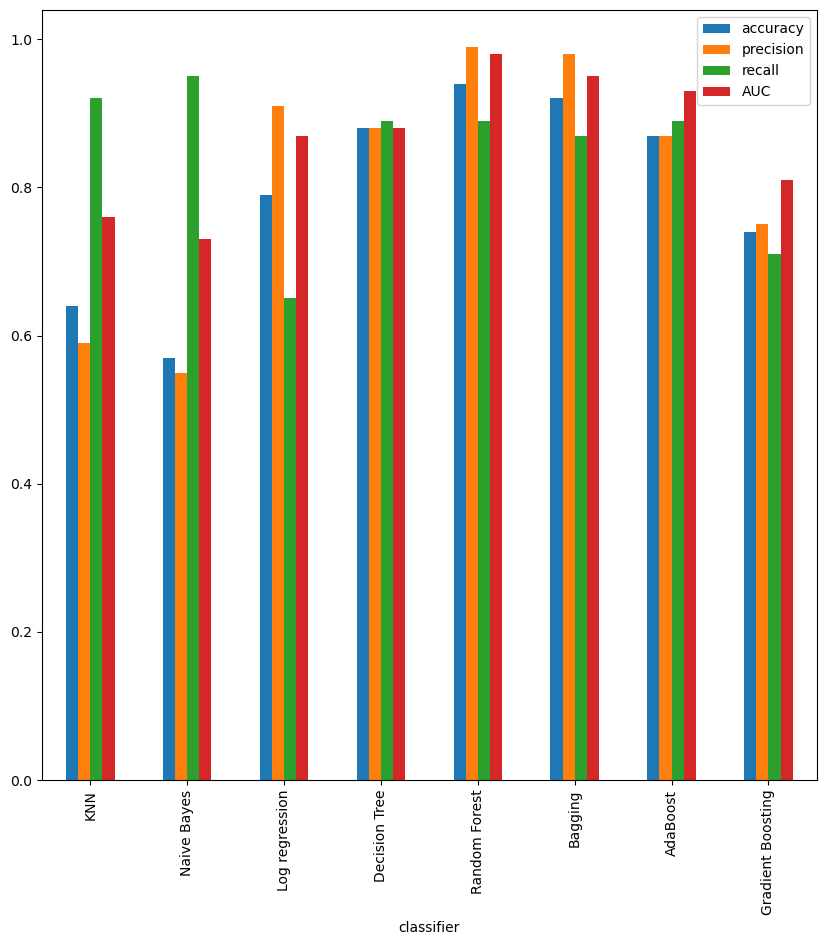

In [130]:
model_results.plot(kind='bar', figsize=(10,10))

We choose Random Forests as the model showing best results on our data and metricses

In [131]:
import pickle

In [132]:
filename = "/home/pavlo/projects/readmission/models/random_forest.pickle"

In [133]:
pickle.dump(rf, open(filename, 'wb'))
